<a href="https://colab.research.google.com/github/iqra221016/-testdrug_discovery/blob/main/Calculating%20molecular%20fingerprints%20available%20in%20RDkit%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:lightgreen; border-style: dotted;border-color: yellow;text-align:center;color:blue;font-size:20px;border-radius: 50px;padding: 20px 20px;"><strong> Gashaw M. Goshu, Ph.D. in Chemistry</strong></div>


In [71]:
!pip install rdkit==2024.3.5

## Generating Some of the Molecular Fingerprints Available in [RDKit library](https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints)


<b> What are molecular fingerprints?</b><br/> Molecular fingerprints are molecular descriptors that encode molecular features/fragments of a molecule in the form of a binary digit (0 or 1). So, we can use molecular fingerprints to perform computations. A bit is ON or 1 if a certain fragment is found in a molecular structure. <br/>

<div>
 <img src = "thumnail.JPG";width = "700";align = "left" />  
</div>

### Application of fingerprints:
* Structure, substructure, and similarity search for virtual ligand screening from compound databases, <br/>
* Machine learning – Quantitative Structure-Activity Relationship (QSAR) and Quantitative Structure-Property Relationship (QSPR)

### In this notebook, I will show you how to generate the following fingerprints.
*  Molecular ACCess System keys or MACCS-keys
*   Avalon fingerprint
*   Atom-pair fingerprint
*   Topological-Torsions fingerprint.
*   Morgan fingerprint or Circular Fingerprint
*   RDKit Fingerprint

[RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html#feature-definitions-used-in-the-morgan-fingerprints)
<div>
  <img src = "Available_rdkit_descriptors.JPG", width = "700", align = "left"/>  
    </div>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import PandasTools
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

 ### Reference for the dataset :  [Sandfort et al ](https://www.sciencedirect.com/science/article/pii/S2451929420300851)

In [73]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gashawmg/HOMO-LUMO-Enegry-gap-Prediction/master/Orbital_Energies_input_data.csv')
dataset.head(10)

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
5,OC(C=C)C=C,210.979194
6,O=N(=O)c1ccc(Cl)c(c1)N(=O)=O,168.833179
7,O=CC1CCCCC1,213.451579
8,COc1ccc(cc1)C#C,171.191985
9,Brc1cncnc1,188.344944


In [74]:
# Include 2D structure of molecules
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/PandasTools.py

from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'SMILES', 'Structure')
# Enable molecule rendering
PandasTools.RenderImagesInAllDataFrames(images=True)  # For all DataFrames

,SMILES,Energygap,Structure
0,Cc1ccc(cc1)C(F)(F)F,197.749421,
1,OC(=O)CCCCl,247.493942,
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,
3,Nc1ccc(Cl)c(Cl)c1,169.027707,
4,C[C@@H](CCO)CCC=C(C)C,209.569808,
...,...,...,...
2899,C(CP(c1ccccc1)c1ccccc1)P(c1ccccc1)c1ccccc1,168.649319,
2900,Brc1cccc2sccc12,162.928319,
2901,CCO[C@H]1C=Cc2ccccc2N1C(=O)OCC,165.098245,
2902,s1ccc2ccccc12,167.958431,

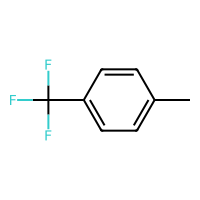
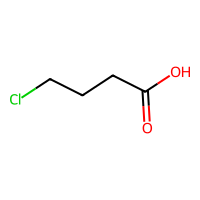
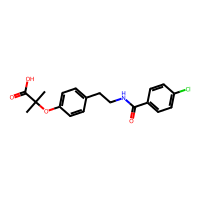
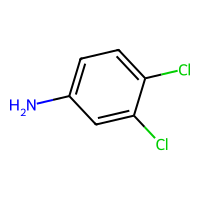
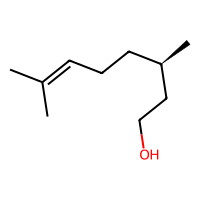
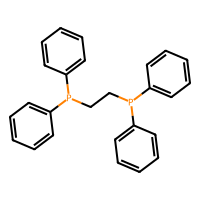
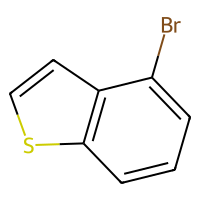
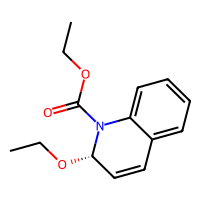
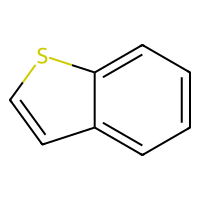
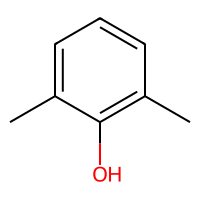

In [75]:
dataset

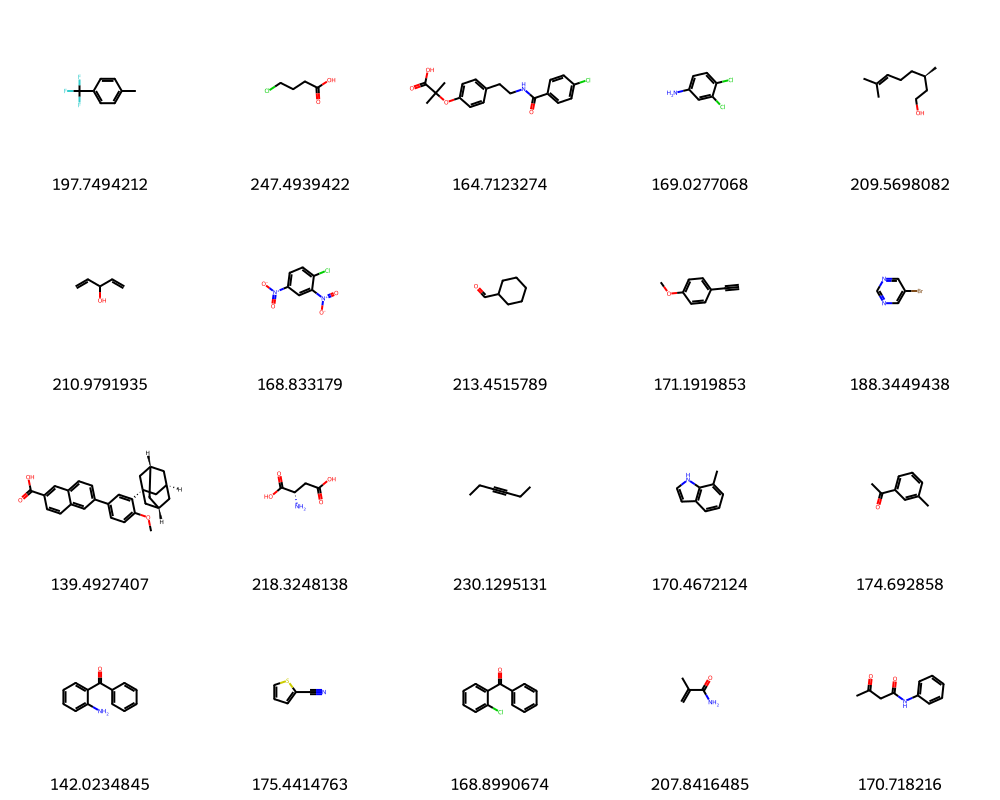

In [76]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100,
                     legends=[str(x) for x in dataset.Energygap], subImgSize=(200,200), molsPerRow=5)

<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:25px;border-radius: 10px;padding: 20px 20px;">
1. MACCS-keys Fingerprint (166 public keys)
 </div>

It has pre-defined structural feature and implemented as `key: value pairs or dictionary`. Mainly used for substructure search. For example, if the 162 bit is on, there is an aromatic ring. [RDKit](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py):
   <p>162: ('a', 0),  # Aromatic</p>

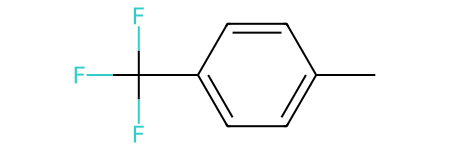

In [77]:
dataset.Structure[0]

In [78]:
# Generate MACCS (Molecular ACCess System) keys
from rdkit.Chem import MACCSkeys
Mkeys = MACCSkeys.GenMACCSKeys(dataset.Structure[0])

# Use numpy array to see On and Off bits
print(np.array(Mkeys))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0]


In [79]:
len(Mkeys)

167

In [80]:
np.array(Mkeys).shape

(167,)

<div style= "color:green;font-size:30px; padding : 15px">
Accessing indexes of ON bits
</div>

In [81]:
# print On bits
print("Index of On bits:",tuple(Mkeys.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(Mkeys.GetOnBits()))

Index of On bits: (42, 106, 107, 112, 134, 160, 162, 163, 165)
Number of On bits:  9


In [82]:
print("Index of On bits:", np.nonzero(Mkeys))
print("Number of On bits: ", np.count_nonzero(Mkeys))

Index of On bits: (array([ 42, 106, 107, 112, 134, 160, 162, 163, 165]),)
Number of On bits:  9


<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:25px;border-radius: 10px;padding: 20px 20px;">
 2. Avalon Fingerprint
 </div>

Avalon uses a fingerprint generator that enumerates
certain paths and feature classes of the molecular graph.[reference](https://pubs.acs.org/doi/pdf/10.1021/ci050413p)

In [83]:
# Calculate Avalon fingerprints
from rdkit.Avalon import pyAvalonTools
Av = pyAvalonTools.GetAvalonFP(dataset.Structure[0], nBits=512)
print(np.array(Av))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [84]:
# print On bits
print("Index of On bits:",tuple(Av.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(Av.GetOnBits()))

Index of On bits: (18, 58, 67, 81, 92, 124, 138, 150, 153, 157, 196, 198, 206, 207, 221, 222, 234, 250, 266, 274, 282, 293, 305, 324, 328, 333, 341, 343, 351, 367, 383, 389, 390, 401, 455, 464, 472, 478, 508)
Number of On bits:  39


<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:25px;border-radius: 10px;padding: 20px 20px;">
3. Atom-Pairs Fingerprint
</div>

[Atom-pair implementation in RDKit](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/AtomPairs/Pairs.py)


In [85]:
# Calculate Atom-Pair fingerprints
from rdkit.Chem import rdMolDescriptors
AP = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(dataset.Structure[0], nBits=512)
print(np.array(AP))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 

[07:36:48] DEPRECATION WARNING: please use AtomPairGenerator


In [86]:
# print On bits
print("Index of On bits:",tuple(AP.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(AP.GetOnBits()))

Index of On bits: (36, 88, 89, 92, 128, 129, 140, 160, 161, 162, 220, 221, 224, 225, 226, 232, 233, 248, 249, 276, 277, 292, 293, 336, 340, 341, 344, 388, 389, 412, 420, 421, 422, 472, 473, 484, 485, 486, 500, 501, 508, 509)
Number of On bits:  42


<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:25px;border-radius: 10px;padding: 20px 20px;">
4. Topological-Torsions Fingerprint
</div>

In [87]:
# Calculate Topological-Torsions fingerprints
TT = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(dataset.Structure[0], nBits=512)
print(np.array(TT))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[07:36:50] DEPRECATION WARNING: please use TopologicalTorsionGenerator


In [88]:
# print On bits
print("Index of On bits:",tuple(TT.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(TT.GetOnBits()))

Index of On bits: (176, 177, 178, 248, 249, 356, 357, 380, 381, 382, 464, 465)
Number of On bits:  12


<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:20px;border-radius: 10px;padding: 20px 20px;">
5. Morgan-Circular Fingerprints (Circular Fingerprints)
</div>

## Reference [RDKit blog](https://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html)


In [89]:
onbits = {}
mf = AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[0], 2, nBits=512, bitInfo=onbits)
print(np.array(mf))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[07:36:57] DEPRECATION WARNING: please use MorganGenerator


In [90]:
# print On bits
print("Index of On bits:",tuple(mf.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(mf.GetOnBits()))

Index of On bits: (33, 114, 129, 186, 214, 235, 236, 287, 297, 337, 356, 383, 384, 392, 393, 429)
Number of On bits:  16


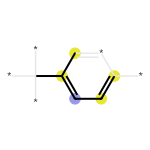

In [91]:
# Which fragment makes a bit ON? or  display the feature that turn a bit ON?

Draw.DrawMorganBit(dataset.Structure[0], 129, onbits)

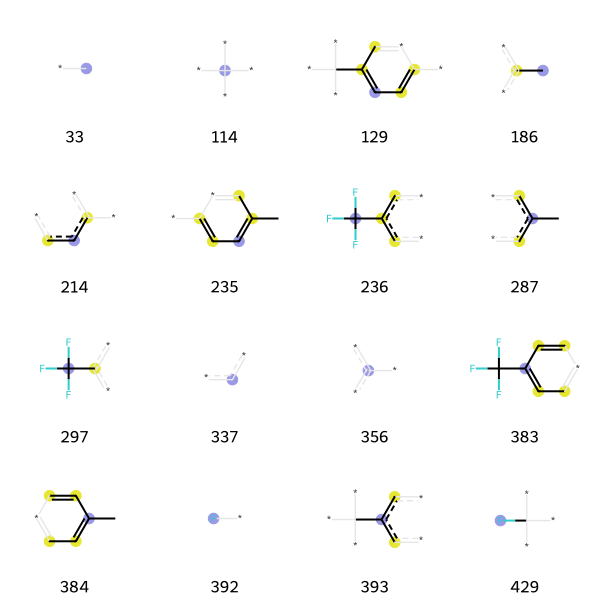

In [92]:
# Render all the fragments or features that are responsible for making ON bits
all_fragments = [(dataset.Structure[0], x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:25px;border-radius: 10px;padding: 20px 20px;">
6. RDKit Fingerprint
</div>

In [93]:
rdkbi = {}
Rdk = AllChem.RDKFingerprint(dataset.Structure[0], maxPath=5, fpSize=512, bitInfo=rdkbi)
print(np.array(AllChem.RDKFingerprint(mol=dataset.Structure[0], maxPath=5, fpSize=512)))

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 

In [94]:
# print On bits
print("Index of On bits:",tuple(Rdk.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(Rdk.GetOnBits()))

Index of On bits: (2, 9, 16, 17, 19, 27, 28, 36, 40, 41, 62, 63, 93, 103, 124, 127, 137, 152, 157, 161, 170, 192, 194, 196, 205, 232, 248, 252, 271, 278, 280, 294, 309, 314, 324, 330, 342, 343, 353, 373, 383, 389, 405, 418, 432, 437, 441, 451, 460, 465, 470, 473, 481, 485, 491, 501)
Number of On bits:  56


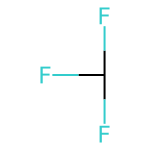

In [95]:
# Visualize a fragment using index of ON bit
Draw.DrawRDKitBit(dataset.Structure[0],16,rdkbi)

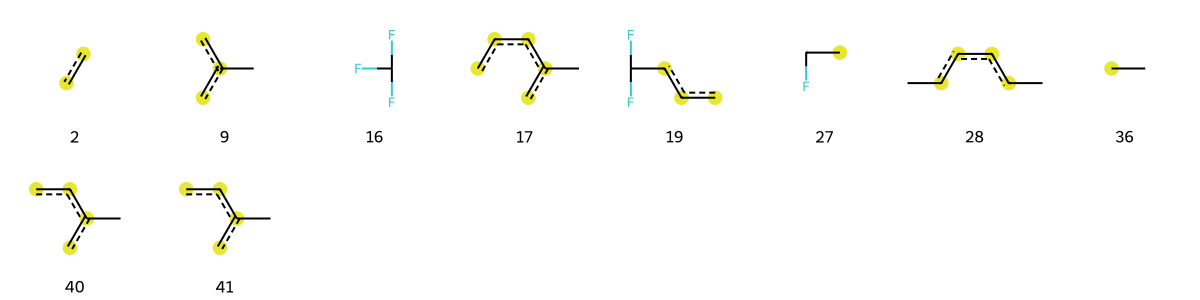

In [96]:
# Visualize more fragments
fragments = [(dataset.Structure[0], x, rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(fragments[:10],molsPerRow=8,legends=[str(x) for x in rdkbi][:10])

<div style= "background-color: lightcyan; border-style:dotted;text-align:left;color:blue;font-size:20px;border-radius: 10px;padding: 20px 20px;">
Generating  Fingerprints for Multiple Molecules
</div>

In [97]:
# function definition
def generate_fpts(data):
    # create empty lists to store fingerprints

    # Morgan fingerprint
    Mfpts = []

    # Avalon fingerprint
    Avfpts = []

    # Topological Torsion fingerprint
    TT_fpts = []

    for mol in tqdm(data):

        # Calculate Morgan fingerprints and append to the empty list above
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        Mfpts.append(mfpt)

        # Calculate Avalon fingerprints and append to the empty list above
        Avfpt = pyAvalonTools.GetAvalonFP(mol, nBits=2048)
        Avfpts.append(Avfpt)

        #calculate TopologicalTorsion fingerprints and append to the empty list above
        TT_fpt = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=2048)
        TT_fpts.append(TT_fpt)

    return np.array(Mfpts), np.array(Avfpts), np.array(TT_fpts)

In [98]:
# function call
mfpts, Avfpts, TT_fpts = generate_fpts(dataset.Structure[:200])

  0%|          | 0/200 [00:00<?, ?it/s][07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGenerator
[07:37:11] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[07:37:11] DEPRECATION WARNING: please use MorganGe

In [99]:
mfpts.shape

(200, 2048)

In [100]:
Avfpts.shape

(200, 2048)

In [101]:
TT_fpts.shape

(200, 2048)

In [102]:
def generate_avfpts(data):

    Avfpts = [pyAvalonTools.GetAvalonFP(mol, nBits=1024) for mol in data]

    return np.array(Avfpts)

In [103]:
Avalon_fpts = generate_avfpts(dataset.Structure[:15])
Avalon_fpts.shape

(15, 1024)

<div style = "color:green"><h1>Practice  problem</h1>
<strong style="color:blue"> <h3>
 Write a function to generate  Atom-Pairs and MACCS-keys fingerprints for multiple molecules</h3>
</strong>
 </div>

<div style= "color:green;font-size:25px; padding : 10px">
     * Molecular Similarity
 </div>

Tanimoto coefficient is the number of elements in the intersection of two sets divided by number of elements in the union of the two sets.
(A & B/ A | B).

<div>
<img src = "tanimoto.JPG"; width = "600"; align = "left"/>
 </div>

<div>
  <img src = "Similarity.JPG"; align="left"; width="500"/>  
</div>

[Reference](https://www.cs.tufts.edu/comp/150CSB/refs/2015%20Molecular%20fingerprint%20similarity%20search%20in%20virtual%20screening.pdf)

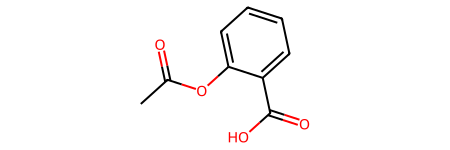

In [104]:
# 2D structure or molecular graph of aspirin
aspirin = AllChem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

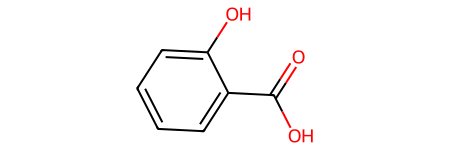

In [105]:
# 2D structure or molecular graph salicylic acid
salicylic_acid = AllChem.MolFromSmiles('O=C(O)c1ccccc1O')
salicylic_acid

In [106]:
# Get the Morgan fingerprints of asprin and salicylic acid
# store the index of ON bits
bit_asp = {}
bit_sal = {}

aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=2048, bitInfo=bit_asp)
salicylic_acid_fp = AllChem.GetMorganFingerprintAsBitVect(salicylic_acid, 2, nBits=2048, bitInfo=bit_sal)

[07:37:27] DEPRECATION WARNING: please use MorganGenerator
[07:37:27] DEPRECATION WARNING: please use MorganGenerator


In [107]:
print("Salicylic acid:", sorted(set(salicylic_acid_fp.GetOnBits())))
print("Aspirin", sorted(set(aspirin_fp.GetOnBits())))

Salicylic acid: [389, 456, 650, 807, 1047, 1088, 1199, 1211, 1380, 1447, 1519, 1602, 1607, 1750, 1831, 1873, 1917, 1991]
Aspirin [389, 456, 650, 695, 807, 909, 1017, 1035, 1047, 1057, 1088, 1199, 1380, 1410, 1447, 1468, 1616, 1729, 1750, 1775, 1873, 1917, 1970, 1991]


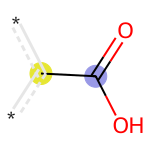

In [108]:
Draw.DrawMorganBit(salicylic_acid, 456, bit_sal)

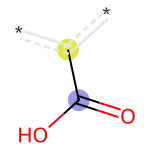

In [109]:
Draw.DrawMorganBit(aspirin, 456, bit_asp)

In [110]:
# ON bits found in both asprin and salcylic acid
intersection = set(salicylic_acid_fp.GetOnBits()) & set(aspirin_fp.GetOnBits())
print("intersection:", intersection)
print("How many bits?:", len(intersection))

intersection: {1088, 1380, 389, 807, 456, 1447, 650, 1991, 1199, 1873, 1750, 1047, 1917}
How many bits?: 13


In [111]:
Union = set(salicylic_acid_fp.GetOnBits()) | set(aspirin_fp.GetOnBits())
print("Union:", Union)
print("How many bits?:", len(Union))

# Tanimoto coefficient is the number of ON bits in the intesection of two sets divided by their Union
print("Tanimoto coefficient:?:", len(intersection)/len(Union)) # 13/29

Union: {1410, 389, 650, 1035, 909, 1047, 1057, 807, 1447, 1831, 1199, 1970, 695, 1211, 1468, 1088, 1729, 1602, 1607, 456, 1991, 1616, 1873, 1750, 1380, 1519, 1775, 1017, 1917}
How many bits?: 29
Tanimoto coefficient:?: 0.4482758620689655


<div style= "color:green;font-size:30px; padding : 15px">
Calculating Tanimoto coefficient using RDKit
</div>

In [112]:
# Calculating Tanimoto coefficient using RDKit
DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.TanimotoSimilarity)

0.4482758620689655

In [113]:
print("TanimotoSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.TanimotoSimilarity))
print("DiceSimilarity", DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.DiceSimilarity))
print("CosineSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.CosineSimilarity))

# for more information, visit:
# https://github.com/rdkit/rdkit-orig/blob/master/rdkit/DataStructs/__init__.py

TanimotoSimilarity 0.4482758620689655
DiceSimilarity 0.6190476190476191
CosineSimilarity 0.6254627916220946


<div style= "color:green;font-size:25px; padding : 15px">
1. Searching compounds similar to a query or desired compound
</div>

[07:38:01] DEPRECATION WARNING: please use MorganGenerator


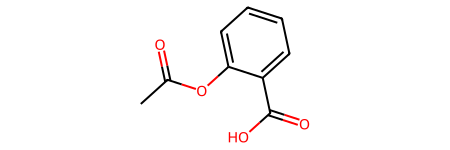

In [114]:
# Let us find compounds similar Aspirin
query = AllChem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
query_fps = AllChem.GetMorganFingerprintAsBitVect(query, 2, nBits=4096)
query

In [115]:
# Calculate the fingerprints of all the compounds(total 2904)
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]

[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerator
[07:38:03] DEPRECATION WARNING: please use MorganGenerat

In [116]:
len(all_Mfpts)

2904

In [117]:
# calculate Tanimoto coefficient of the query compound against each of the compounds in the dataset
# put them in the list
Tanimoto_similarity = [DataStructs.FingerprintSimilarity(query_fps, x, metric=DataStructs.TanimotoSimilarity) for x in all_Mfpts]

In [118]:
# put the Tanimoto coefficient values into data frame.
dataset["tanimoto_values"] = Tanimoto_similarity

In [119]:
# sort Tanimoto coefficient values in decreasing order
dataset_sorted = dataset.sort_values(['tanimoto_values'],ascending=False)

,SMILES,Energygap,Structure,tanimoto_values
1339,CC(=O)Oc1ccccc1C(=O)O,194.030175,,1.000000
2518,COc1ccccc1C(=O)O,177.605755,,0.655172
2504,CCOc1ccccc1C(=O)O,177.259370,,0.593750
1226,OC(=O)c1ccccc1Oc1ccccc1,170.710058,,0.562500
2387,OC(=O)c1ccccc1C(=O)O,174.361533,,0.538462
...,...,...,...,...
1509,C1CCSC1,207.676614,,0.000000
2576,N,249.346976,,0.000000
1308,ClB(Cl)Cl,222.278748,,0.000000
310,ClCC#C,231.620475,,0.000000

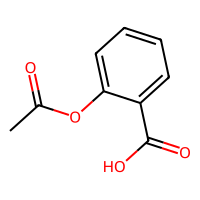
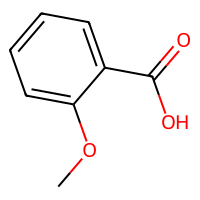
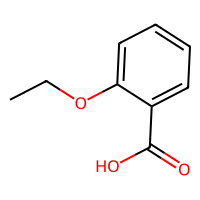
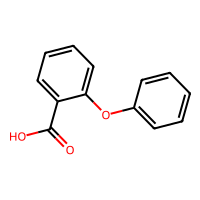
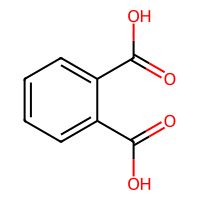
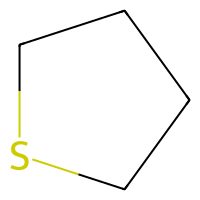
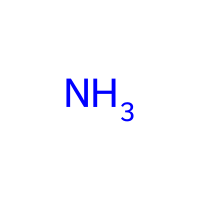
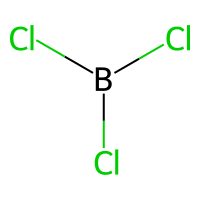
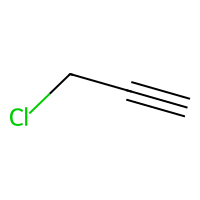
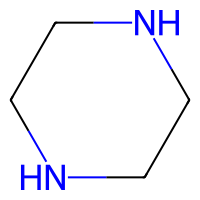

In [120]:
dataset_sorted

,SMILES,Energygap,Structure,tanimoto_values
1339,CC(=O)Oc1ccccc1C(=O)O,194.030175,,1.000000
2518,COc1ccccc1C(=O)O,177.605755,,0.655172
2504,CCOc1ccccc1C(=O)O,177.259370,,0.593750
1226,OC(=O)c1ccccc1Oc1ccccc1,170.710058,,0.562500
2387,OC(=O)c1ccccc1C(=O)O,174.361533,,0.538462
2726,COc1cccc(C(=O)O)c1OC,167.069879,,0.500000
2728,Cc1ccccc1C(=O)O,187.182170,,0.500000

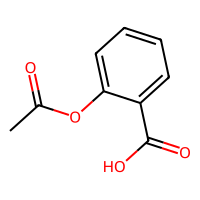
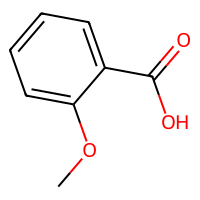
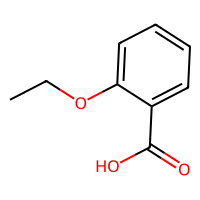
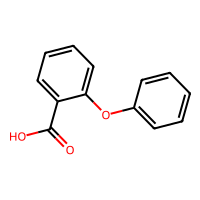
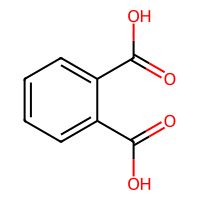
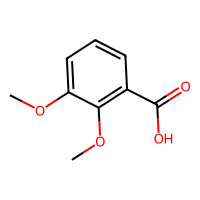
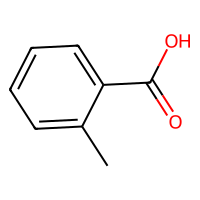

In [121]:
# We can use a threshold value to filter compounds
dataset_sorted[dataset_sorted['tanimoto_values'] >= 0.5]

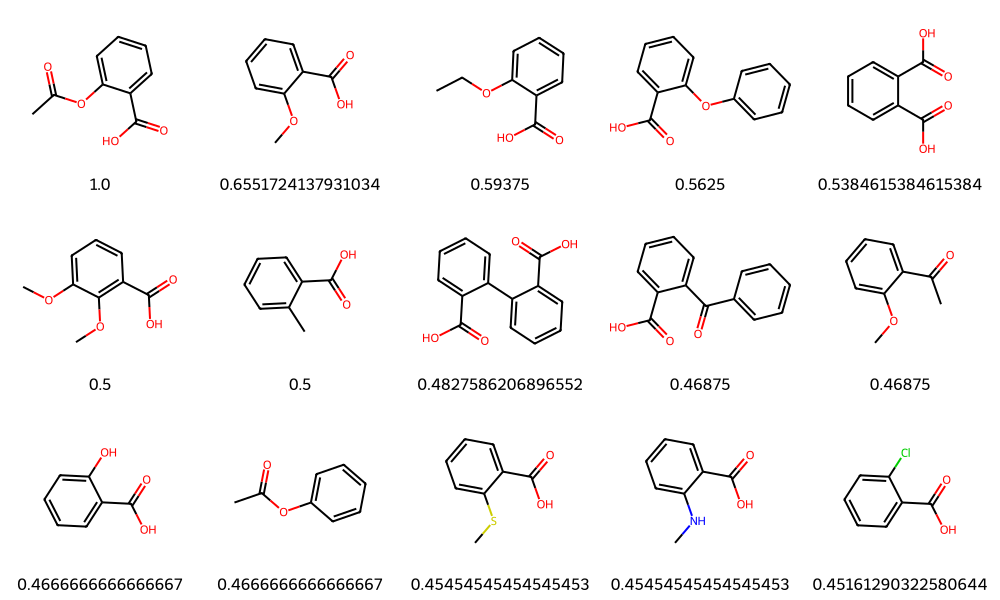

In [122]:
# Display structures and Tanimoto coefficient values
Draw.MolsToGridImage([x for x in dataset_sorted["Structure"]][:15], maxMols=100,
                     legends=[str(x) for x in dataset_sorted.tanimoto_values], subImgSize=(200,200), molsPerRow=5)

<div style= "color:green;font-size:25px; padding : 15px">
2 Calculate Molecular Similarity of Compounds and Clustering
</div>

In [123]:
# Let us use 20 rows of the data to calculate Tanimoto coefficient in matrix form
dataset_matrix =dataset[:20]

In [124]:
# Big Credit for this website: https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html
# Modified their code to my data
# Calculate Morgan fingerprints and store them in a list
fpts_list = []

for mol in dataset_matrix['Structure']:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fpts_list.append(fp)

# put the fingerprint list into the data frame
dataset_matrix['m_fpt2']= fpts_list

#----------------------------------------------
for ind in tqdm(dataset_matrix.index):
    fp1 = dataset_matrix.at[ind,'m_fpt2']
    col_name = dataset_matrix.at[ind,'Structure']
    simlist = []

    for mol in dataset_matrix.Structure:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        sim =DataStructs.TanimotoSimilarity(fp1, fp)
        simlist.append(sim)
    dataset_matrix[col_name] = simlist

[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerator
[07:38:36] DEPRECATION WARNING: please use MorganGenerat

In [127]:
# drop some columns for better visualization
dataset_new = dataset_matrix.drop(['SMILES','Energygap','tanimoto_values','m_fpt2'], axis=1)

# Display 10 rows and columns of the data frame
dataset_20 =  dataset_new.iloc[:10,:11]

# Big Credit for this website: https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html
# Highlight Tanimoto similarity scores with contextual coloring
color_map = sn.light_palette("orange", as_cmap=True)
gradient_color = dataset_20.style.background_gradient(cmap=color_map)
gradient_color

,Structure,,,,,,,,,,
0,,1.000000,0.000000,0.117647,0.103448,0.027778,0.000000,0.083333,0.000000,0.129032,0.074074
1,,0.000000,1.000000,0.120000,0.033333,0.058824,0.041667,0.055556,0.035714,0.000000,0.000000
2,,0.117647,0.120000,1.000000,0.096154,0.050847,0.020000,0.103448,0.018519,0.132075,0.038462
3,,0.103448,0.033333,0.096154,1.000000,0.000000,0.000000,0.258065,0.000000,0.093750,0.074074
4,,0.027778,0.058824,0.050847,0.000000,1.000000,0.107143,0.000000,0.029412,0.025641,0.000000
5,,0.000000,0.041667,0.020000,0.000000,0.107143,1.000000,0.000000,0.043478,0.000000,0.000000
6,,0.083333,0.055556,0.103448,0.258065,0.000000,0.000000,1.000000,0.027778,0.076923,0.058824
7,,0.000000,0.035714,0.018519,0.000000,0.029412,0.043478,0.027778,1.000000,0.000000,0.000000
8,,0.129032,0.000000,0.132075,0.093750,0.025641,0.000000,0.076923,0.000000,1.000000,0.066667
9,,0.074074,0.000000,0.038462,0.074074,0.000000,0.000000,0.058824,0.000000,0.066667,1.000000


,,,,,,,,,,
,,1.000000,0.000000,0.117647,0.103448,0.027778,0.000000,0.083333,0.000000,0.129032
,,0.000000,1.000000,0.120000,0.033333,0.058824,0.041667,0.055556,0.035714,0.000000
,,0.117647,0.120000,1.000000,0.096154,0.050847,0.020000,0.103448,0.018519,0.132075
,,0.103448,0.033333,0.096154,1.000000,0.000000,0.000000,0.258065,0.000000,0.093750
,,0.027778,0.058824,0.050847,0.000000,1.000000,0.107143,0.000000,0.029412,0.025641
,,0.000000,0.041667,0.020000,0.000000,0.107143,1.000000,0.000000,0.043478,0.000000
,,0.083333,0.055556,0.103448,0.258065,0.000000,0.000000,1.000000,0.027778,0.076923
,,0.000000,0.035714,0.018519,0.000000,0.029412,0.043478,0.027778,1.000000,0.000000
,,0.129032,0.000000,0.132075,0.093750,0.025641,0.000000,0.076923,0.000000,1.000000
,,0.074074,0.000000,0.038462,0.074074,0.000000,0.000000,0.058824,0.000000,0.066667

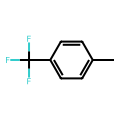
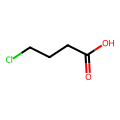
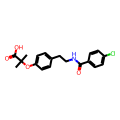
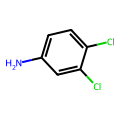
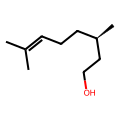
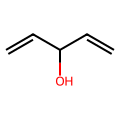
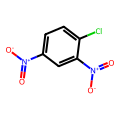
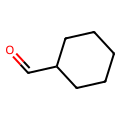
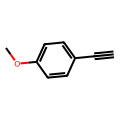
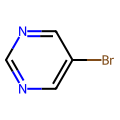
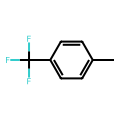
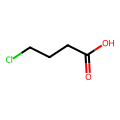
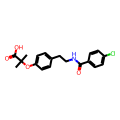
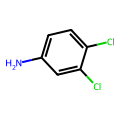
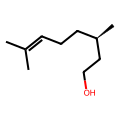
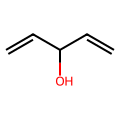
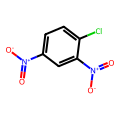
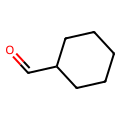
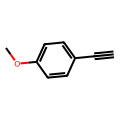
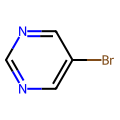

In [132]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import seaborn as sn

# Suppose you have a SMILES column in dataset_matrix before you drop it
# First extract the top 10 molecules' SMILES
smiles_list = dataset_matrix["SMILES"].iloc[:10].tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles_list]

# Generate structure images for each molecule
mol_images = [Draw.MolToImage(m, size=(120, 120)) for m in mols]

# Use HTML <img> tags to display images in the DataFrame
from io import BytesIO
import base64

def image_to_html(img):
    buf = BytesIO()
    img.save(buf, format="PNG")
    return f'<img src="data:image/png;base64,{base64.b64encode(buf.getvalue()).decode()}">'

mol_html = [image_to_html(img) for img in mol_images]

# Prepare your similarity subset
dataset_new = dataset_matrix.drop(['SMILES', 'Energygap', 'tanimoto_values', 'm_fpt2'], axis=1)
dataset_20 = dataset_new.iloc[:10, :10]

# Replace index & columns with structure images
dataset_20.index = mol_html
dataset_20.columns = mol_html

# Apply gradient coloring
color_map = sn.light_palette("orange", as_cmap=True)
styled = dataset_20.style.background_gradient(cmap=color_map).set_table_attributes('class="dataframe"').set_table_styles(
    [{'selector': 'th.col_heading', 'props': [('max-width', '120px')]}]
)

# Display in Jupyter
styled


<div style= "color:blue;font-size:30px; padding : 15px">
 Taylor-Butina Clustering
</div>

In [133]:
# https://pubs.acs.org/doi/pdf/10.1021/ci9803381?casa_token=VL8YLBlPerYAAAAA:5TeiBQCWe3SC020iL04q1ZUvlftWzCMm7fIShE4I2Q6OS5OQGVowA5mvOKU9Ana2nYzzuC5AHXDhp_gsMg
# https://github.com/rdkit/rdkit-orig/blob/master/rdkit/ML/Cluster/Butina.py
# https://www.macinchem.org/reviews/clustering/clustering.php
# Big credit to Pat Walters: https://github.com/PatWalters/workshop/blob/master/clustering/taylor_butina.ipynb
# I used his function with some modification

def TaylorButina_Cluster(fpts, distThresh = 0.3):
    # generate distance matrix:
    dist_matrix = []
    nfpts = len(fpts)
    for i in tqdm(range(1,nfpts)):

        # generate Tanimoto similary
        Tanimoto_coefficients = DataStructs.BulkTanimotoSimilarity(fpts[i],fpts[:i])
        dist_matrix.extend([1 - j for j in Tanimoto_coefficients])

    # cluster the Tanimoto scores using Butina:
    clusters = Butina.ClusterData(dist_matrix, nfpts, distThresh, isDistData=True)
    cluster_id_list = [0] * nfpts
    for idx,cluster in enumerate(clusters,1):
        for member in cluster:
            cluster_id_list[member] = idx
    return cluster_id_list

In [134]:
# the following fingerprints were already calculated previously
# all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]

In [135]:
cluster_id = TaylorButina_Cluster(all_Mfpts, distThresh=0.4)

100%|██████████| 2903/2903 [00:01<00:00, 1866.47it/s]


In [136]:
# Number of clusters
len(np.unique(cluster_id))

2128

,SMILES,Energygap,Structure,Cluster_number
0,Cc1ccc(cc1)C(F)(F)F,197.749421,,2128
1,OC(=O)CCCCl,247.493942,,8
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,,2127
3,Nc1ccc(Cl)c(Cl)c1,169.027707,,2126
4,C[C@@H](CCO)CCC=C(C)C,209.569808,,2125

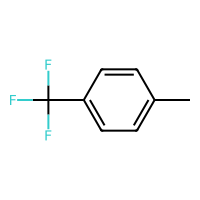
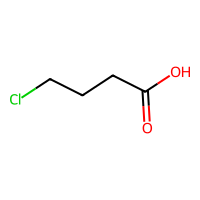
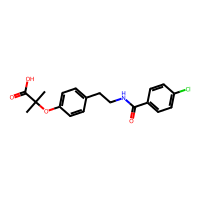
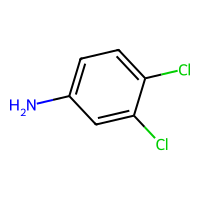
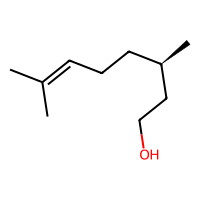

In [137]:
# Select some columns and add a cluster number column
dataset_cs = dataset[['SMILES','Energygap','Structure']]

# Put the cluster id to the data frame
dataset_cs['Cluster_number'] = cluster_id
dataset_cs.head()

In [138]:
# group_by cluster and count structure
dataset_cs.groupby('Cluster_number')['Structure'].count()

,Structure
Cluster_number,
1,24
2,20
3,15
4,13
5,13
...,...
2124,1
2125,1
2126,1


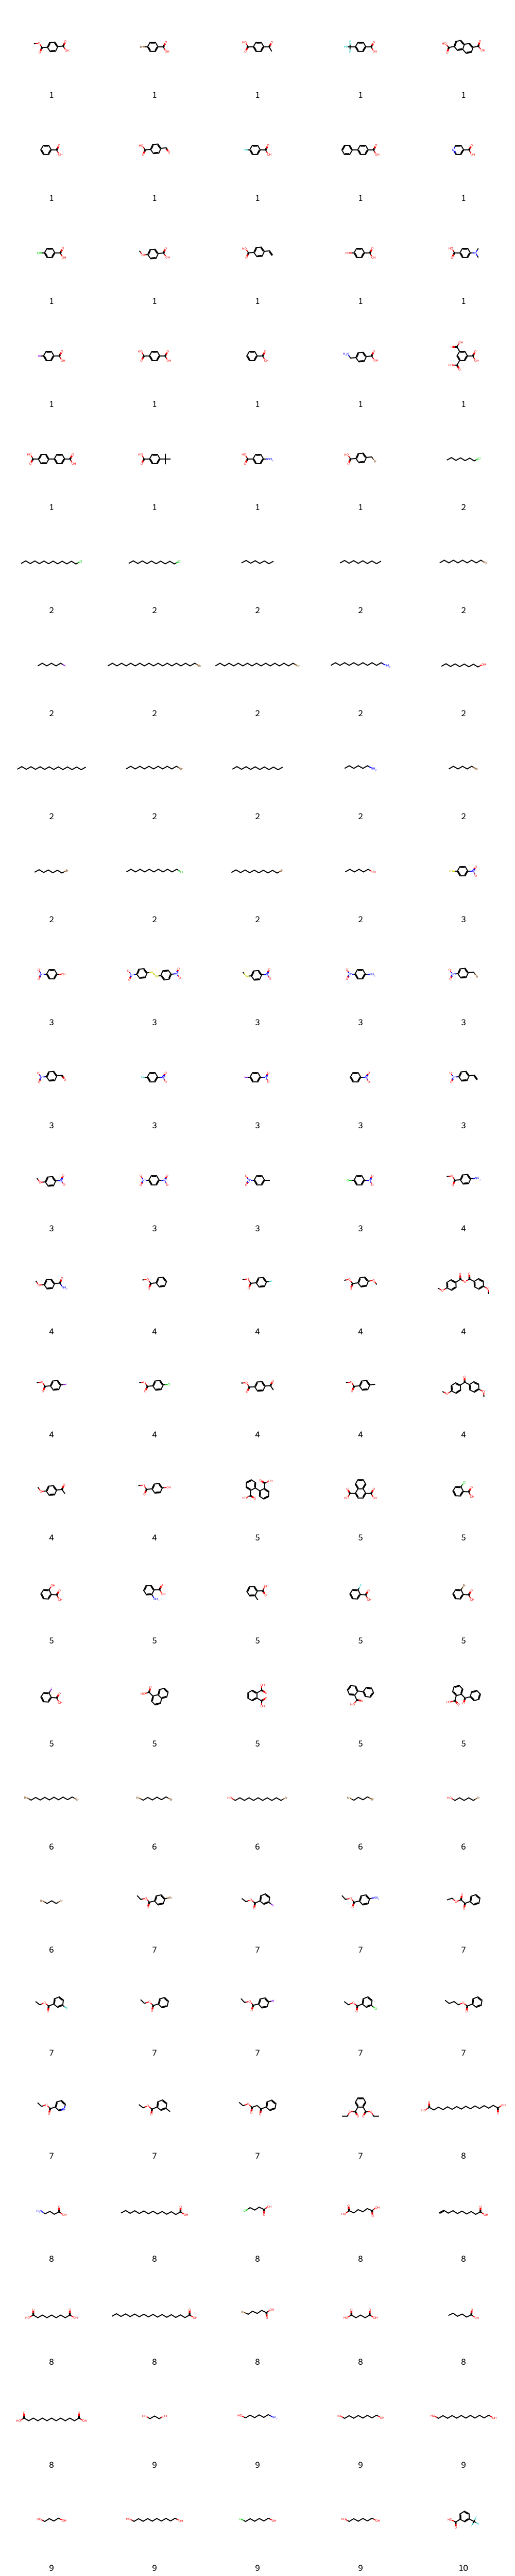

In [139]:
# Sort clusters
dataset_cs_sorted = dataset_cs.sort_values(["Cluster_number"]).head(150)

# from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset_cs_sorted["Structure"]][:125], maxMols=200,
                     legends=[str(x) for x in dataset_cs_sorted.Cluster_number], subImgSize=(200,200), molsPerRow=5)

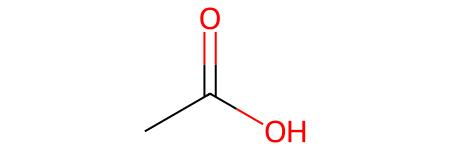

In [140]:
# filter compounds that contain acid functional group
acid = AllChem.MolFromSmiles("CC(=O)O")
acid

,SMILES,Energygap,Structure,tanimoto_values
1,OC(=O)CCCCl,247.493942,,0.138889
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,,0.175439
10,COc1ccc(cc1[C@]12C[C@H]3C[C@H](C[C@H](C3)C1)C2...,139.492741,,0.210526
11,N[C@@H](CC(=O)O)C(=O)O,218.324814,,0.135135
21,CC(C)[C@@H](N)C(=O)O,225.284516,,0.171429
...,...,...,...,...
2877,CCOC(=O)C(=O)N,204.446825,,0.135135
2878,CCOC(=O)[C@@H](Br)C(C)C,216.932999,,0.121951
2884,CCOC(=O)CCCCC(=O)O,222.888059,,0.175000
2885,CC(C)[C@@H](N)C(=O)O,225.261926,,0.171429

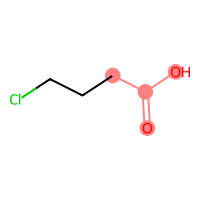
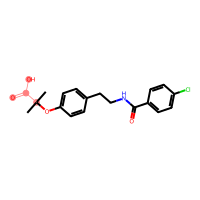
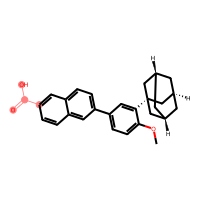
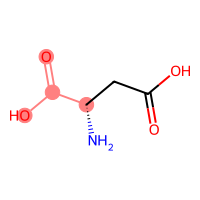
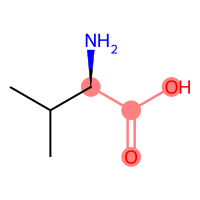
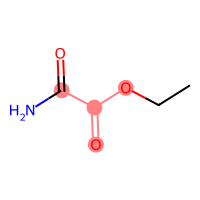
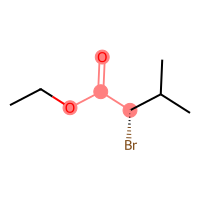
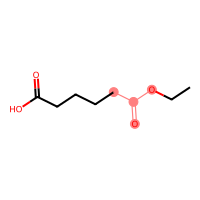
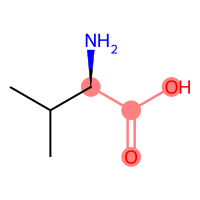
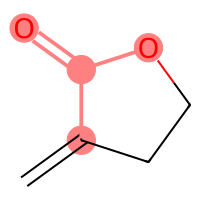

In [141]:
dataset_acid = dataset[dataset["Structure"] >= acid]
dataset_acid

### Summary:
We have learned how to calculate molecular fingerprints (MACCS-keys, Avalon, Atom-pair, Topological-Torsions and Morgan fingerprints) using RDKit for a single molecule or multiple molecules. We also saw how to calculate Tanimoto coefficient and Taylor-Butina clustering.
In the next video, I will show you how to use molecular fingerprints to develop machine-learning models using some chemistry benchmark datasets. Stay tuned!